##### Data Cleaning


In [ ]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
img = cv2.imread("./test-image.jpg")
img.shape

In [ ]:
## converting the image to gray scale
## to reduce dimension

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape

In [ ]:
img

In [ ]:
### We will use cascade file to crop eyes and face
### If there are only 2 eyes, then it is a valid image
### If there are more than 1 face, then it is an invalid image

face_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_default.xml")
eyes_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces[0]

In [ ]:
### the output is in the form (x1, y1, x2, y2)

(x,y,w,h) = faces[0]

face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 5)
plt.imshow(face_img)

In [ ]:
face = img[ y:y+h, x:x+w]
plt.imshow(face)

In [ ]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
        
    img = cv2.imread(image_path)
    if img.any() == True:
        return
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            roi_color_reshaped = cv2.resize(roi_color,(255,255))
            return roi_color_reshaped

In [ ]:
plt.matshow(get_cropped_image_if_2_eyes("./test-image.jpg"))

In [ ]:
import os

face_names = os.listdir("./dataset/")
face_names

In [ ]:
os.chdir("../")

In [ ]:
os.chdir("./dataset/lionel_messi/")

In [ ]:
os.listdir()

In [ ]:
os.chdir("./image classification/")
os.getcwd()

In [ ]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs


In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

In [28]:
os.getcwd()

'f:\\Programming\\Python\\ML_New\\image classification'

In [29]:
os.chdir("./cropped/")

In [40]:
img_dirs = [i for i in os.listdir()]
img_dirs

['lionel_messi',
 'maria_sharapova',
 'roger_federer',
 'serena_williams',
 'virat_kohli']

In [41]:
### Feature Engineering

celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['lionel_messi\\lionel_messi1.png',
  'lionel_messi\\lionel_messi10.png',
  'lionel_messi\\lionel_messi11.png',
  'lionel_messi\\lionel_messi13.png',
  'lionel_messi\\lionel_messi14.png',
  'lionel_messi\\lionel_messi15.png',
  'lionel_messi\\lionel_messi16.png',
  'lionel_messi\\lionel_messi17.png',
  'lionel_messi\\lionel_messi18.png',
  'lionel_messi\\lionel_messi19.png',
  'lionel_messi\\lionel_messi2.png',
  'lionel_messi\\lionel_messi20.png',
  'lionel_messi\\lionel_messi22.png',
  'lionel_messi\\lionel_messi23.png',
  'lionel_messi\\lionel_messi24.png',
  'lionel_messi\\lionel_messi25.png',
  'lionel_messi\\lionel_messi26.png',
  'lionel_messi\\lionel_messi27.png',
  'lionel_messi\\lionel_messi28.png',
  'lionel_messi\\lionel_messi29.png',
  'lionel_messi\\lionel_messi3.png',
  'lionel_messi\\lionel_messi30.png',
  'lionel_messi\\lionel_messi32.png',
  'lionel_messi\\lionel_messi33.png',
  'lionel_messi\\lionel_messi34.png',
  'lionel_messi\\lionel_messi35.png',

In [42]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [47]:
!pip install PyWavelets

   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/4.3 MB 525.1 kB/s eta 0:00:09
    --------------------------------------- 0.1/4.3 MB 656.4 kB/s eta 0:00:07
    --------------------------------------- 0.1/4.3 MB 656.4 kB/s eta 0:00:07
   - -------------------------------------- 0.1/4.3 MB 554.9 kB/s eta 0:00:08
   - -------------------------------------- 0.1/4.3 MB 554.9 kB/s eta 0:00:08
   - -------------------------------------- 0.2/4.3 MB 546.6 kB/s eta 0:00:08
   -- ------------------------------------- 0.2/4.3 MB 599.0 kB/s eta 0:00:07
   -- ------------------------------------- 0.3/4.3 MB 655.4 kB/s eta 0:00:07
   -- ------------------------------------- 0.3/4.3 MB 655.4 kB/s eta 0:00:07
   -- ------------------------------------- 0.3/4.3 MB 655.4 kB/s eta 0:00:07
   -- ------------------------------------- 0.3/4.3 MB 655.4 kB/s eta 0:00:07
   -

In [48]:
import pywt


def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [49]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [50]:
len(X[0])

4096

In [51]:

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(168, 4096)

In [53]:
### Model training

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, random_state=42, shuffle=True, train_size=0.75
)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.8333333333333334

In [62]:
### Use GridSearch to find the best model

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [63]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [65]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    print("Training completed for: "+algo)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Training completed for: svm
Training completed for: random_forest
Training completed for: logistic_regression


,model,best_score,best_params
0,svm,0.889231,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.737846,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.904923,{'logisticregression__C': 1}


In [66]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [68]:
my_pipeline = Pipeline([('scaler', StandardScaler()), ('LogisticRegression', LogisticRegression(C=1, solver="liblinear"))])

my_pipeline.fit(X_train, Y_train)
my_pipeline.score(X_test, Y_test)

0.8571428571428571

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, my_pipeline.predict(X_test))
cm

array([[9, 0, 1, 1, 0],
       [0, 7, 0, 1, 0],
       [0, 0, 5, 1, 0],
       [0, 0, 0, 7, 0],
       [1, 0, 0, 1, 8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

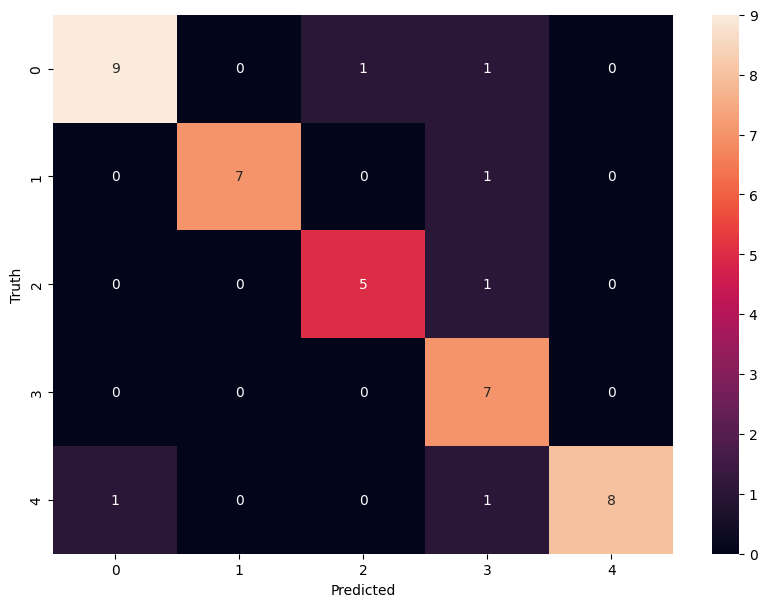

In [70]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(my_pipeline, 'saved_model.pkl') 

['saved_model.pkl']

In [73]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))